# Creators
* Morgan Dally - 1313361
* Reece Breebaart - 1314828

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
def print_predicted_stats(predicted, y_test):
    hit = 0
    miss = 0
    for actual, prediction in zip(y_test, predicted):
        if actual == prediction:
            hit += 1
            continue
        miss += 1
    percent = 100 - ((miss/hit) * 100)
    print('missed: %d\nhit: %d\n%d%s' % (miss, hit, percent, '% accuracy'))

In [3]:
input_csv_loc = '../input/wisconsin_breast_cancer.csv'
bccf = pd.read_csv(input_csv_loc)
# get rid of NaN entries, save prev and post counts for VERBOSE mode
bccf_clean = bccf.dropna()
bccf_clean.head()

,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


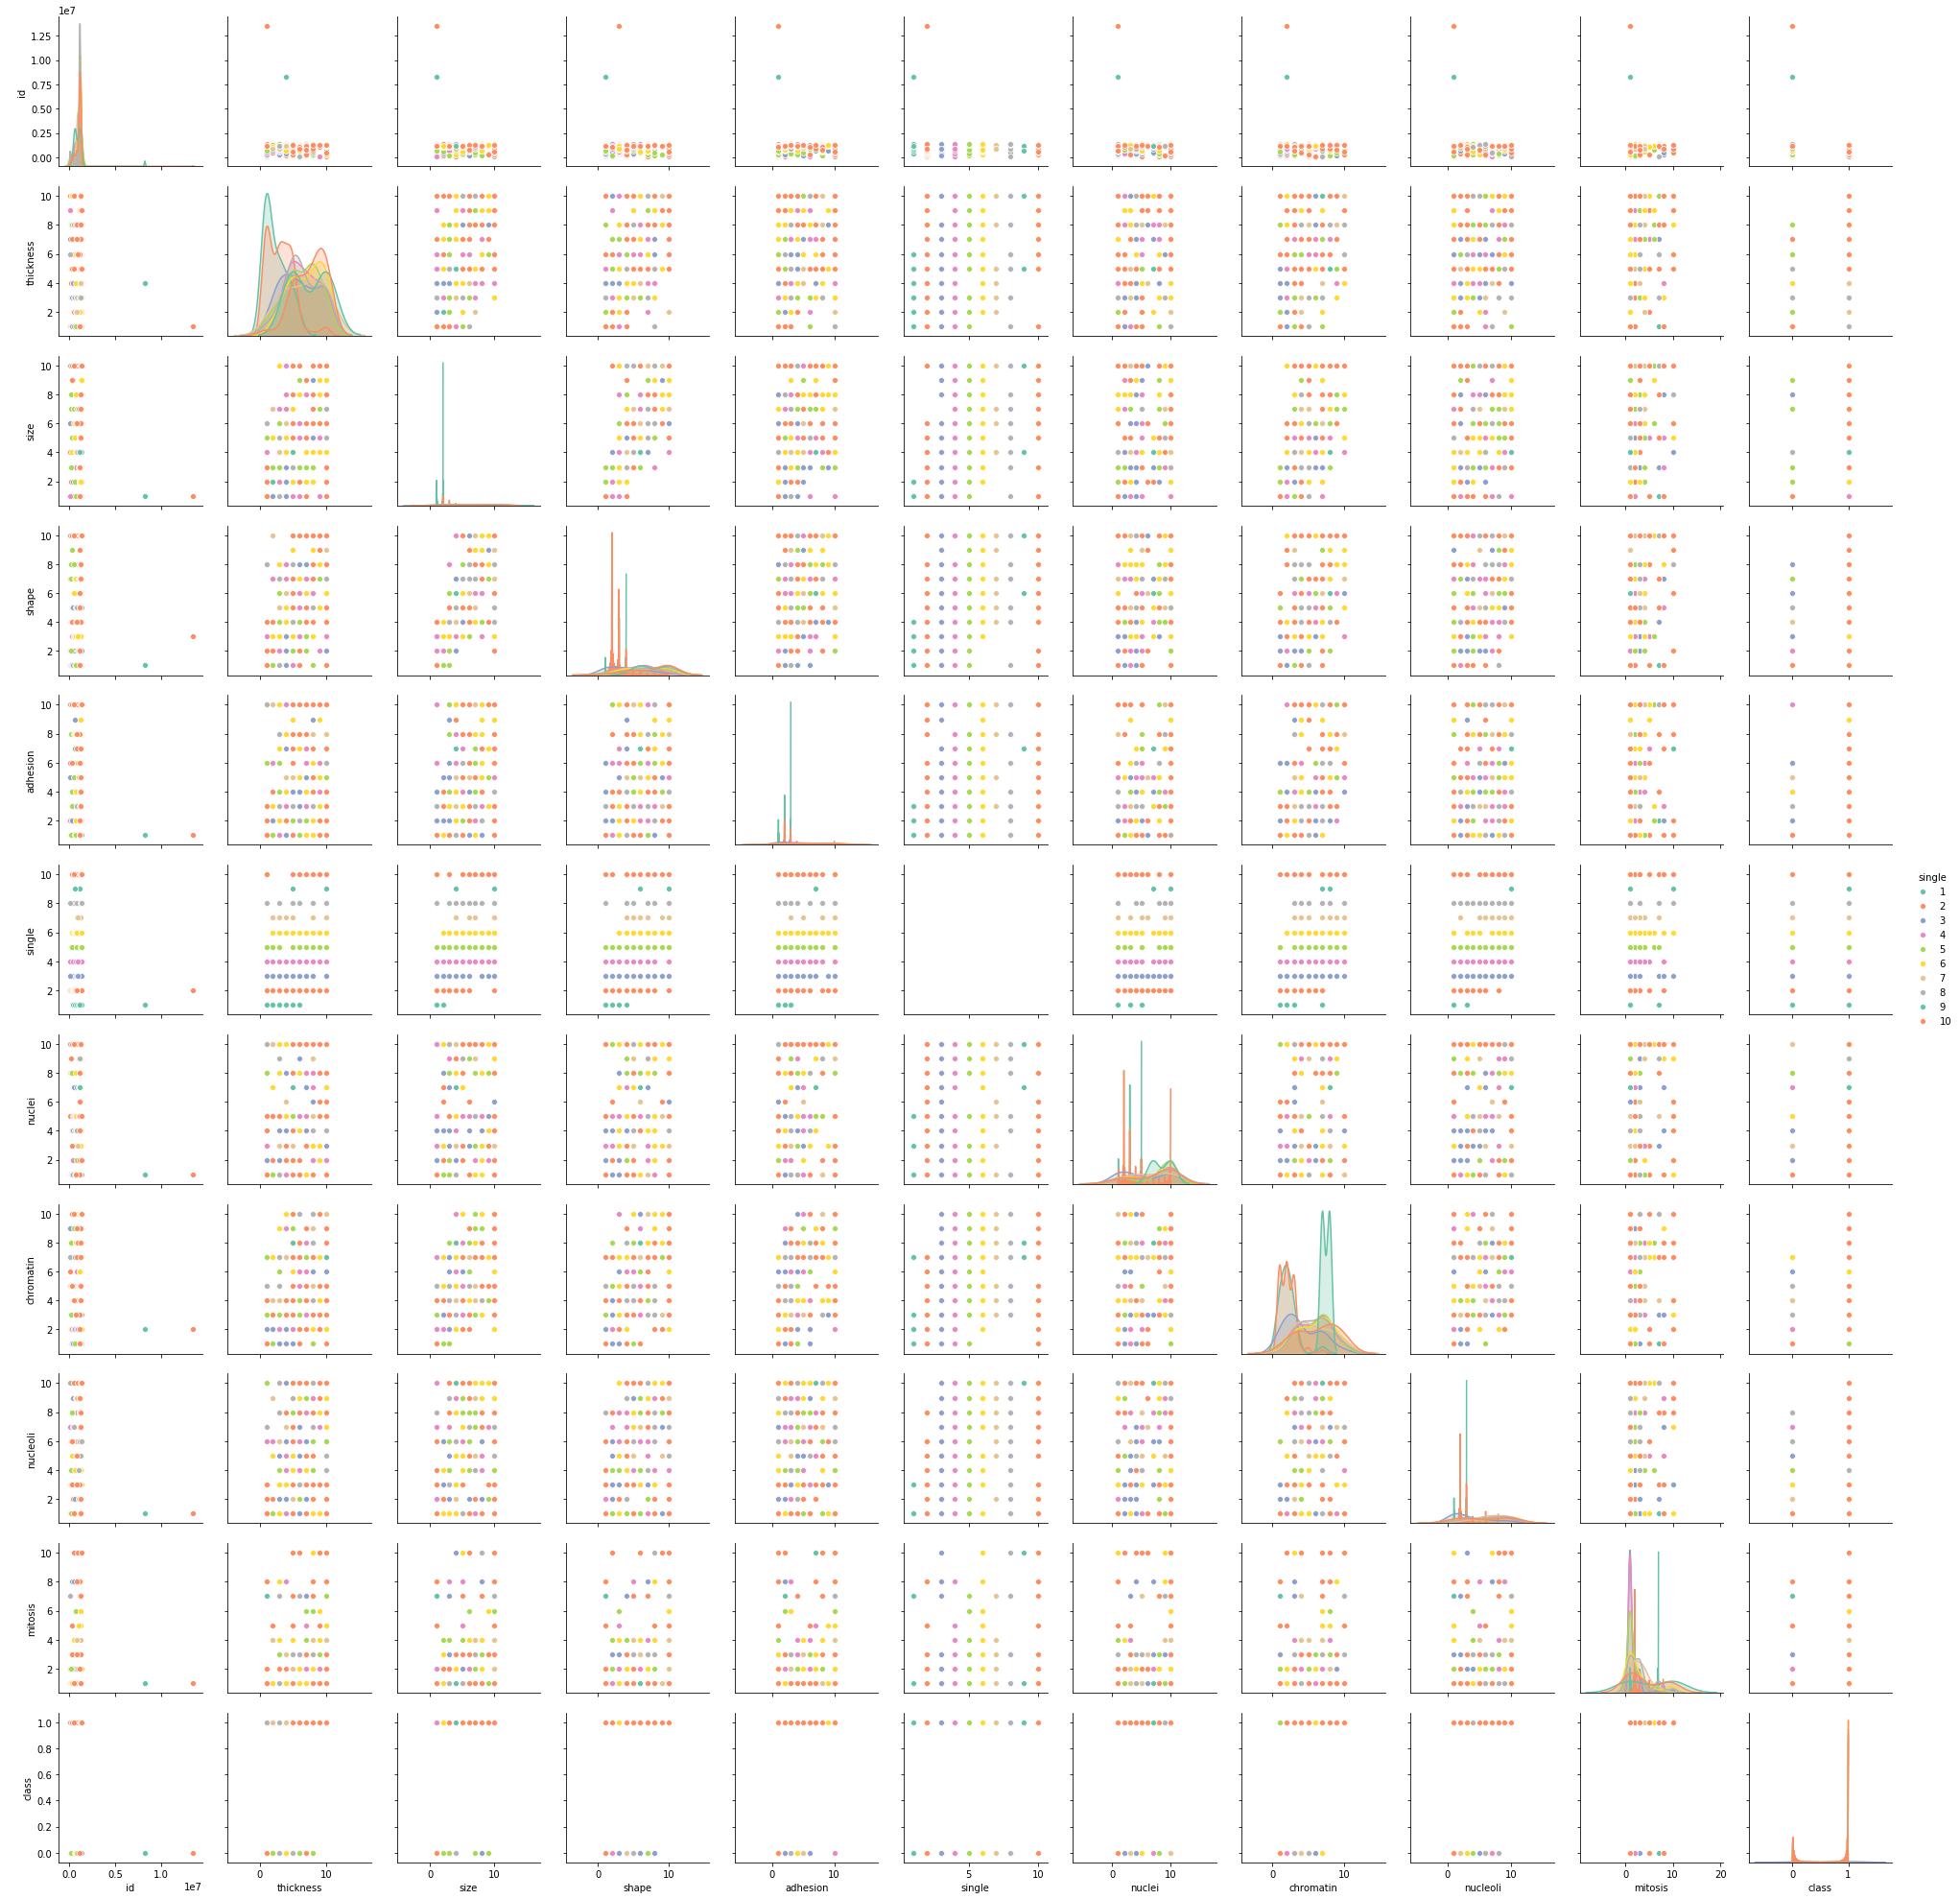

In [4]:
import seaborn as sns
sns.pairplot(data=bccf_clean, hue='single', palette='Set2')

In [5]:
from sklearn.model_selection import train_test_split

# select all entries, then get from col1 and select up until the end, exlcuding it
x_dat = bccf_clean.iloc[:, 1:-1]
# select all entries, then get col 10
y_dat = bccf_clean.iloc[:, 10]

x_train, x_test, y_train, y_test = train_test_split(x_dat, y_dat, test_size=0.2, random_state=547839)

print('x_train: %s\ny_train: %s\nx_test: %s\ny_test: %s' % (
    x_train.shape, y_train.shape,
    x_test.shape, y_test.shape))

x_train: (546, 9)
y_train: (546,)
x_test: (137, 9)
y_test: (137,)


In [6]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [7]:
predicted = model.predict(x_test)
print_predicted_stats(predicted, y_test)

missed: 4
hit: 133
96% accuracy


In [8]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predicted))

[[83  4]
 [ 0 50]]


In [9]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        87
           1       0.93      1.00      0.96        50

   micro avg       0.97      0.97      0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137



In [10]:
x_test.head()

,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis
334,8,6,7,3,3,10.0,3,4,2
556,5,2,2,2,1,1.0,2,1,1
527,4,1,1,1,2,1.0,3,1,1
562,1,1,1,1,2,1.0,3,1,1
422,4,3,3,1,2,1.0,3,3,1


# xsub train
## Our xsub column choices:
* thickness
* size or shape (these two will be related features so try either or)
* single
* chromatin

## Choice reasoning:
Why we didn't choose:
* shape or size
  * will choose either one, they look closely related
* adhesion - seems to only show variation when nuceli/chromatin increases, nuclei/chromatin should suffice
* nuclei
* nucleoli - little variation, suspect we wont get much out of this data

Class 0 looks to be easier to distinguish from class 1, so therefore we eyeballed the data to try and select columns that make the class 1 features more prominent.

In [11]:
"""
cols:
    thickness: 0,
    size: 1,
    shape: 2,
    adhesion: 3,
    single: 4,
    nuclei: 5,
    chromatin: 6,
    nucleoli: 7,
    mitosis: 8
my choice: [thickness, size, single, chromatin]
"""
# selecting rows to increase accuracy - eyeballed 99% accuracy
rows = [0, 1, 4, 6]
# experimenting getting bad accuracy, came out with 96%
# rows = [5, 4, 8, 1]
xsub_train = x_train.iloc[:, rows]
xsub_test = x_test.iloc[:, rows]
xsub_train.head()

,thickness,size,single,chromatin
455,10,2,2,1
16,4,1,2,2
264,7,9,10,5
14,8,7,7,5
633,8,7,5,5


In [12]:
second_model = SVC()
second_model.fit(xsub_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [13]:
sub_predicted = second_model.predict(xsub_test)
print_predicted_stats(sub_predicted, y_test)

missed: 4
hit: 133
96% accuracy


In [14]:
print(confusion_matrix(y_test, sub_predicted))

[[84  3]
 [ 1 49]]


In [15]:
print(classification_report(y_test, sub_predicted))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        87
           1       0.94      0.98      0.96        50

   micro avg       0.97      0.97      0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



# Discussion
*First random state*
Results:
* x_train: 98% accuracy
* xsub_train: 99% accuracy

Both tests were accurate, however the second test, using the sub data set, was the more successful with a 1% gain over the first test.
The largest improvement was seen in the prediction of the second class, as the precision increased from 95% to 98%. In both cases the first class was predicted correctly every time.
Thus, it seems that the second test is the better approach due to its increase in precison, however our small data set may have influenced the results (546 train, 137 test).

*After specifying seed 547839*
Results:
* x_train: 96% accuracy
* xsub_train: 96% accuracy

Suprisingly, both of our tests in this state came out with the same results, with a 96% accuracy. Once again, the first class was predicted correctly every time, yet the second class was predicted with a precision of 93% in the first test, and 94% in the second test.

One thing we can conclude from our tests is that there isn't a large difference between the two tests in terms of precision and sucess rate.

# kNN Tests

In [16]:
import sklearn.neighbors
#when k value is 1
knn_1_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=1)
knn_1_model.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=1, p=2,
          weights='uniform')

In [17]:
knn_1_predicted = knn_1_model.predict(x_test)
print_predicted_stats(knn_1_predicted, y_test)

missed: 4
hit: 133
96% accuracy


In [18]:
print(confusion_matrix(y_test, knn_1_predicted))

[[85  2]
 [ 2 48]]


In [19]:
print(classification_report(y_test, knn_1_predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        87
           1       0.96      0.96      0.96        50

   micro avg       0.97      0.97      0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



In [20]:
#when k value is 1
knn_5_model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
knn_5_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
knn_5_predicted = knn_5_model.predict(x_test)
print_predicted_stats(knn_5_predicted, y_test)

missed: 3
hit: 134
97% accuracy


In [22]:
y_test.head()

334    1
556    0
527    0
562    0
422    0
Name: class, dtype: int64

In [23]:
print(confusion_matrix(y_test, knn_5_predicted))

[[85  2]
 [ 1 49]]


In [24]:
print(classification_report(y_test, knn_5_predicted))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        87
           1       0.96      0.98      0.97        50

   micro avg       0.98      0.98      0.98       137
   macro avg       0.97      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137



# Summary

## kNN Results
* When k = 1: 96% accuracy
* When k = 5: 97% accuracy

## SVC with all features
* x_train: 96% accuracy

## Subset
* xsub_train: 96% accuracy

We can see from all these tests that the one with the highest accuracy was the kNN test where we calculated the 5 nearest neighbours. This shows that our data was reasonably clustered together as taking the 5 nearest neighbours than just 1 gave the machine a greater understanding of how to predict the data. In this particular state the predictions were all quite accurate, however as we trialled a few different states we found that there is typically a lot more variation.

To conclude, I believe that the nearest neighbour model where k=5 is the most accurate test for this particular set of data.